In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [9]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

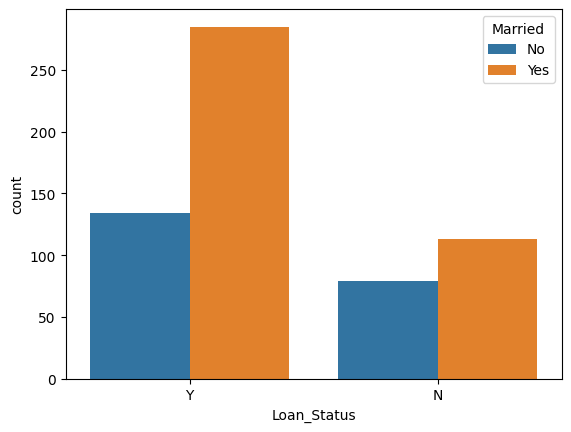

In [10]:
sns.countplot(data = df , x = 'Loan_Status' , hue = 'Married')
plt.show()

In [11]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

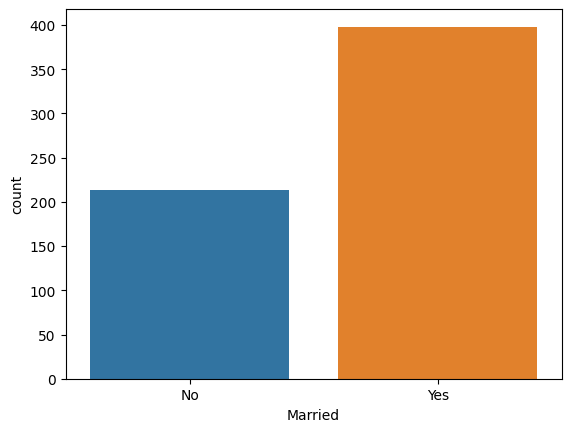

In [12]:
sns.countplot(data = df , x = 'Married')
plt.show()

In [13]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [14]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [15]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

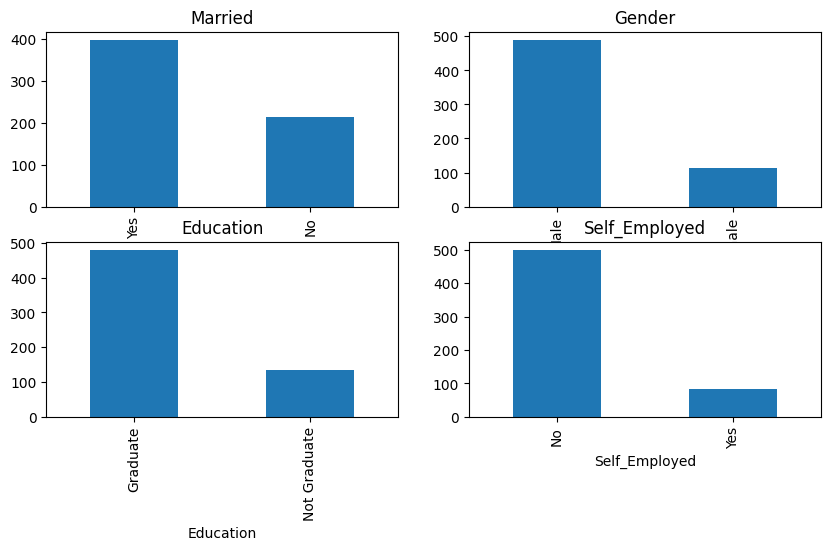

In [16]:
plt.figure(figsize=(5, 3))

plt.subplot(2,2,1)
df['Married'].value_counts().plot.bar(figsize=(10,5) , title="Married")

plt.subplot(2,2,2)
df['Gender'].value_counts().plot.bar(figsize=(10,5) , title ="Gender")

plt.subplot(2,2,3)
df['Education'].value_counts().plot.bar(figsize=(10,5) ,title ="Education")

plt.subplot(2,2,4)
df['Self_Employed'].value_counts().plot.bar(figsize=(10,5),title ="Self_Employed")

plt.show()


In [17]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [18]:
df['Dependents'] = df['Dependents'].replace("3+" , "3")

In [19]:
df['Dependents'].value_counts()

Dependents
0    345
1    102
2    101
3     51
Name: count, dtype: int64

In [20]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

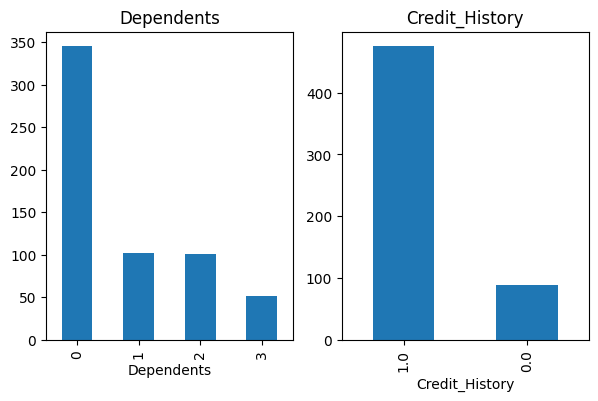

In [21]:
plt.subplot(1,2,1)
plt.subplot(1,2,1)
df['Dependents'].value_counts().plot.bar(figsize=(7,4) , title="Dependents")

plt.subplot(1,2,2)
df['Credit_History'].value_counts().plot.bar(figsize=(7,4) , title ="Credit_History")
plt.show()

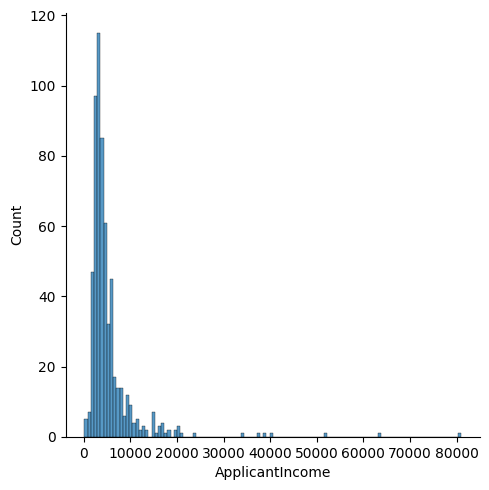

In [22]:
sns.displot(data=df , x = 'ApplicantIncome')
plt.show()

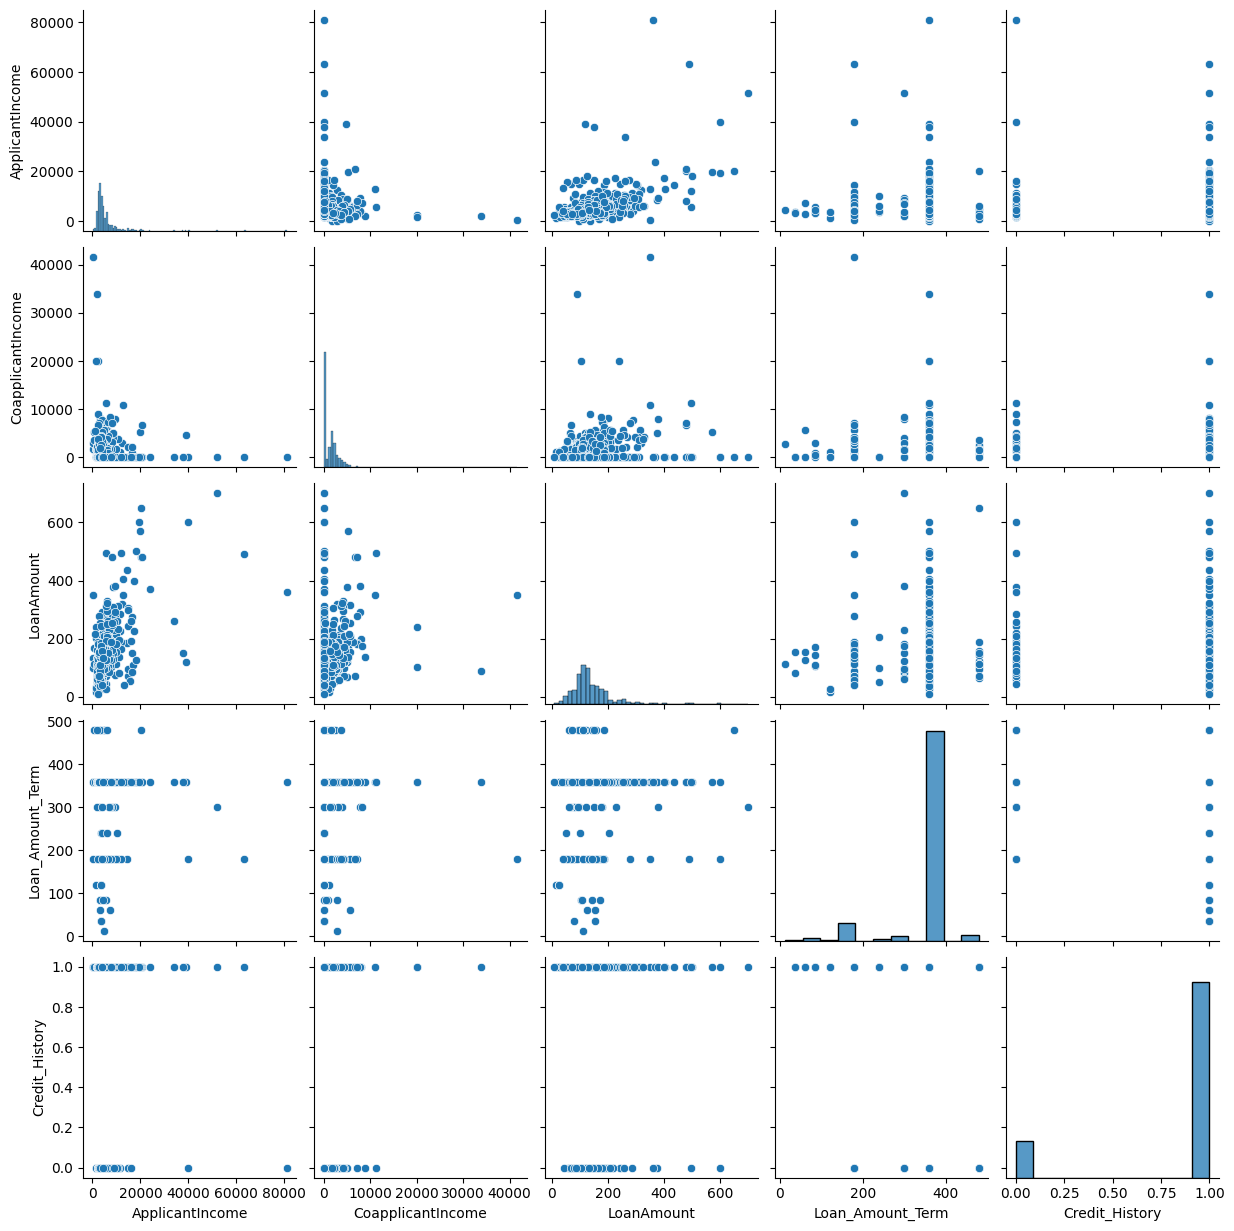

In [23]:
sns.pairplot(df)

In [24]:
numeric_df = df.select_dtypes(include=['number'])

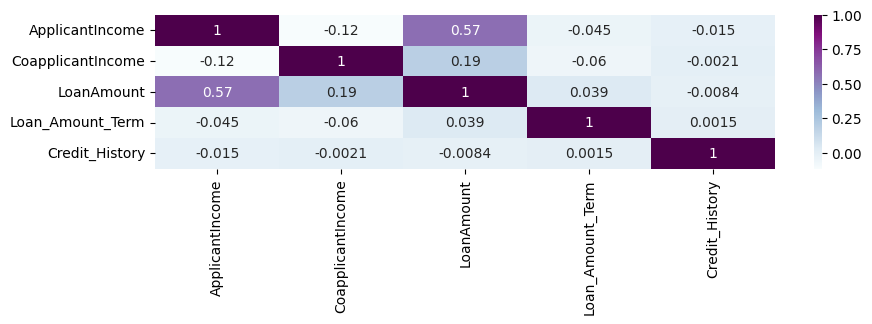

In [25]:
plt.figure(figsize=(10,2))
sns.heatmap(numeric_df.corr(),cmap='BuPu',annot=True)
plt.show()

In [26]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
numeric_col= df.select_dtypes([int,float]).columns
object_col= df.select_dtypes([object]).columns
print('object columns: ', object_col)
print('numeric columns:' , numeric_col)

object columns:  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
numeric columns: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [28]:
for i  in numeric_col:
    df[i].fillna(round(df[i].mean(),2),inplace=True)

In [29]:
for i  in object_col:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [30]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [32]:
df.drop(df['CoapplicantIncome'][df['CoapplicantIncome']>10000].index, inplace=True)
df.drop(df['ApplicantIncome'][df['ApplicantIncome']>25000].index, inplace=True)


In [33]:
object_col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
la_e = LabelEncoder()

In [36]:
df['Dependents']=df['Dependents'].astype('int')

In [37]:
df['Gender'] = la_e.fit_transform(df['Gender'])
df['Married'] = la_e.fit_transform(df['Married'])
df['Education'] = la_e.fit_transform(df['Education'])
df['Self_Employed'] = la_e.fit_transform(df['Self_Employed'])
df['Loan_Status'] = la_e.fit_transform(df['Loan_Status'])
df['Property_Area']=la_e.fit_transform(df['Property_Area'])

In [38]:
df.drop('Loan_ID' , axis = 1 , inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 601 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    int64  
 1   Married            601 non-null    int64  
 2   Dependents         601 non-null    int64  
 3   Education          601 non-null    int64  
 4   Self_Employed      601 non-null    int64  
 5   ApplicantIncome    601 non-null    int64  
 6   CoapplicantIncome  601 non-null    float64
 7   LoanAmount         601 non-null    float64
 8   Loan_Amount_Term   601 non-null    float64
 9   Credit_History     601 non-null    float64
 10  Property_Area      601 non-null    int64  
 11  Loan_Status        601 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 61.0 KB


In [40]:
df['Property_Area']

0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: Property_Area, Length: 601, dtype: int64

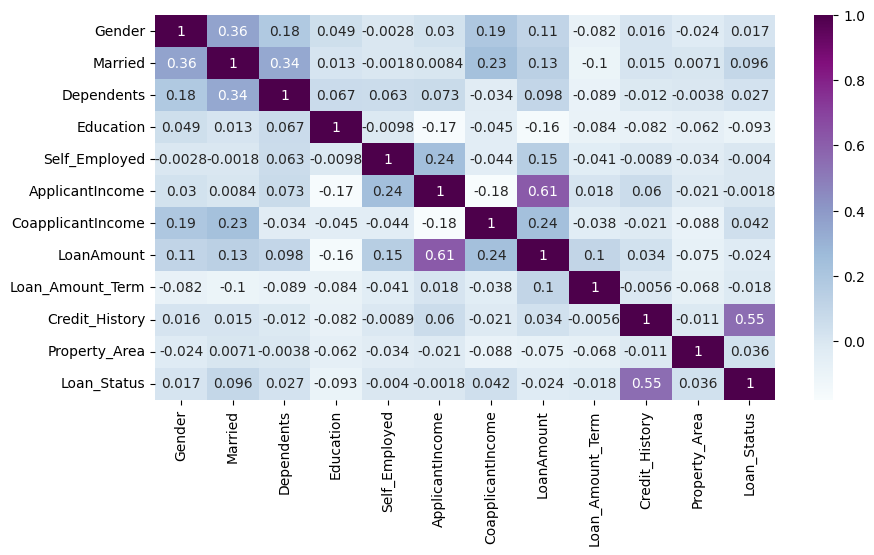

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='BuPu',annot=True)
plt.show()

In [42]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
Stander = StandardScaler()

In [45]:
X = Stander.fit_transform(X)

In [46]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size = .25 , random_state=42)

In [47]:
logistic = LogisticRegression(max_iter =1000)

In [48]:
logistic.fit(X_train , y_train)

LogisticRegression(max_iter=1000)

In [49]:
y_pred_logistic = logistic.predict(X_test)

In [50]:
accuracy_score(y_test ,y_pred_logistic)

0.8410596026490066

In [51]:
print(classification_report(y_test ,y_pred_logistic))

              precision    recall  f1-score   support

           0       0.95      0.45      0.61        42
           1       0.82      0.99      0.90       109

    accuracy                           0.84       151
   macro avg       0.89      0.72      0.76       151
weighted avg       0.86      0.84      0.82       151



In [52]:
confusion_matrix(y_test ,y_pred_logistic)

array([[ 19,  23],
       [  1, 108]])

In [53]:
detr = DecisionTreeClassifier(max_depth=1000 )

In [54]:
detr.fit(X_train ,y_train)

DecisionTreeClassifier(max_depth=1000)

In [55]:
y_pred_detr =detr.predict(X_test)

In [56]:
accuracy_score(y_test , y_pred_detr)

0.7483443708609272

In [57]:
print(classification_report(y_test , y_pred_detr))

              precision    recall  f1-score   support

           0       0.54      0.64      0.59        42
           1       0.85      0.79      0.82       109

    accuracy                           0.75       151
   macro avg       0.70      0.72      0.70       151
weighted avg       0.76      0.75      0.75       151



In [58]:
confusion_matrix(y_test ,y_pred_detr)

array([[27, 15],
       [23, 86]])